# Estymator jądrowy gęstości

Estymator jądrowy gęstości lub jądrowy estymator gęstości to rodzaj estymatora nieparametrycznego, przeznaczony do wyznaczania gęstości <b> rozkładu zmiennej losowej</b> (my na razie myślimy o rozkładzie punktów), na podstawie uzyskanej próby, czyli wartości jakie badana zmienna przyjęła w trakcie dotychczasowych pomiarów.

Niech dana będzie $d$-wymiarowy zbiór danych $X$. Jej estymator jądrowy
$$ 
\hat{f} : \mathbb{R}^d \to [0,\infty) 
$$
wyznacza się w oparciu o wartości $n$-elementowej próby losowej
$
x_{1},x_{2},...,x_{n}
$
w swej podstawowej formie jest on definiowany wzorem
$$ 
\hat{f}(x) = \frac{1}{nh^d}\sum_{i=1}^{n} K\left(\frac{x-x_i}{h}\right)\ ,
$$
gdzie mierzalna, symetryczna względem zera oraz posiadająca w tym punkcie słabe maksimum globalne funkcja 
$$ 
K : \mathbb{R}^d \to [0,\infty)
$$ 
spełnia warunek $ \int_{\mathbb{R}^n}{K(x)dx}=1$ i nazywana jest jądrem, natomiast dodatni współczynnik $h$ określa się mianem parametru wygładzania.


Najefektywniejszym w sensie kryterium błędu średniokwadratowego jest tak zwane jądro Epanecznikowa
$$
K(x) =
 \begin{cases}
 \frac{3}{4}(1-x^2) & \mbox{dla } x \in [-1,1]\\
 0 & \mbox{dla } x\in(-\infty,-1)\cup(1,\infty)
 \end{cases}.
$$
Można też używać gęstości rozkładu normalnego.

https://pl.wikipedia.org/wiki/Estymator_j\%C4\%85drowy_g\%C4\%99sto\%C5\%9Bci



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# plotNorm
Poniższa funkcja rysuje jądro araz do tabliccy <tt>xcum</tt>, <tt>ycum</tt> dodaje wartości estymowanej funkcji gestości.

In [2]:
def plotNorm(pos, sd, xcum, ycum):
    ''' Plot individual curves '''
    
    x = np.arange(pos-3*sd, pos+3*sd, 0.1)
    nd = stats.norm(pos, sd)
    y = nd.pdf(x)
    plt.plot(x,y/10, 'r--')
    
    # Cumulative curve
    xcr = np.round(xcum*10)
    xir = np.round(x*10)
    for ii in range(len(xir)):
        ycum[xcr==xir[ii]] += y[ii]
    return ycum

Wygenerujmy prosty zbiór danych narysujmy histogram oraz wyestymowaną gęstość.

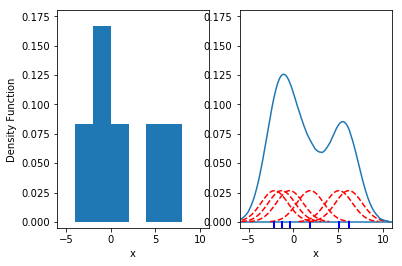

In [3]:
# Generate dummy data
data = np.array([-2.1, -1.3, -0.4, 1.9, 5.1, 6.2])

# Define the two plots
fig, ax = plt.subplots(1,2)
ax[0].hist(data, bins=6, range=[-4, 8], normed=True)
ax[0].set_xlim(-6, 11)
ax[0].set_ylim(-0.005, 0.18)
ax[0].set_xlabel('x')
ax[0].set_ylabel('Density Function')
# Prepare cumulative arrays
xcum = np.arange(-6, 11, 0.1)
ycum = np.zeros_like(xcum)

# Width of the individual Gaussians
var = 2.25
sd = np.sqrt(var)

# Plot individual Gaussians
ax[1].set_xlim(-6, 11)
ax[1].set_ylim(-0.005, 0.18)
ax[1].set_xlabel('x')
ax[1].axhline(0)

for ii in range(len(data)):
    ax[1].plot([data,data], [0, -0.005], 'b')    
    ycum = plotNorm(data[ii], sd, xcum, ycum)

    # Plot cumulative curve
ycum /= np.sum(ycum)/10
ax[1].plot(xcum, ycum)


plt.show()

# Zadanie 1
Wygeneruj gęstość zz pomocą estymacji gęstości z bibljoteki <tt>seaborn</tt> (<tt>sns.kdeplot</tt>).
Czy dostajemy dokładnie tan sam wykres?

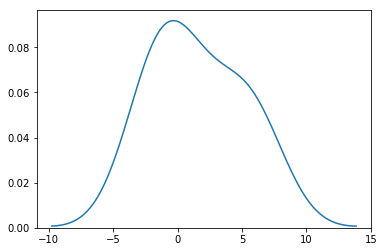

In [13]:
sns.kdeplot(data, kernel='gau')#,bw=0.1)
plt.show()

# Zadanie 4
Ustal szerokość okna $h$ za pomocą stałej Silvermana:
$$h = \left(\frac{4\hat{\sigma}^5}{3n}\right)^{\frac{1}{5}} \approx 1.06 \hat{\sigma} n^{-1/5},$$
gdzie $\sigma$ jest odchyleniem standardowym. 

In [14]:
n=data.size
s=1.06*np.std(data)*pow(n,-0.2)
print(s)

2.33452661282


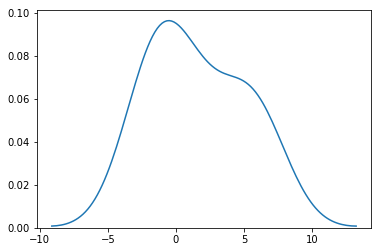

In [16]:
sns.kdeplot(data, kernel='gau',bw=s)
plt.show()

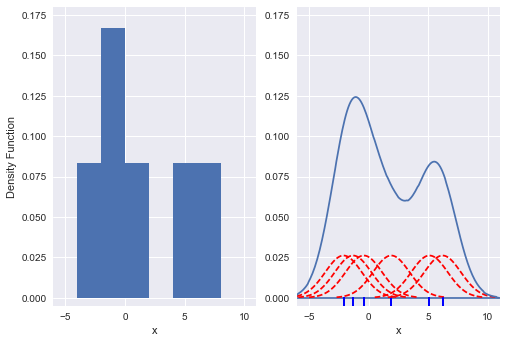

In [71]:
# Define the two plots
fig, ax = plt.subplots(1,2)
ax[0].hist(data, bins=6, range=[-4, 8], normed=True)
ax[0].set_xlim(-6, 11)
ax[0].set_ylim(-0.005, 0.18)
ax[0].set_xlabel('x')
ax[0].set_ylabel('Density Function')
# Prepare cumulative arrays
xcum = np.arange(-6, 11, 0.1)
ycum = np.zeros_like(xcum)

# Width of the individual Gaussians
var = s
sd = np.sqrt(var)

# Plot individual Gaussians
ax[1].set_xlim(-6, 11)
ax[1].set_ylim(-0.005, 0.18)
ax[1].set_xlabel('x')
ax[1].axhline(0)

for ii in range(len(data)):
    ax[1].plot([data,data], [0, -0.005], 'b')    
    ycum = plotNorm(data[ii], sd, xcum, ycum)

    # Plot cumulative curve
ycum /= np.sum(ycum)/10
ax[1].plot(xcum, ycum)


plt.show()

# Zadanie 3
Wygeneruj estymację gęstości za pomocą jądra będącego gęstością rokładu jednostajnego.

In [ ]:
def plotUnif(pos, sd, xcum, ycum):
    ''' Plot individual curves '''
    
    x = np.arange(pos-3*sd, pos+3*sd, 0.1)
    nd = stats.uniform(pos, sd)
    y = nd.pdf(x)
    plt.plot(x,y/10, 'r--')
    
    # Cumulative curve
    xcr = np.round(xcum*10)
    xir = np.round(x*10)
    for ii in range(len(xir)):
        ycum[xcr==xir[ii]] += y[ii]
    return ycum

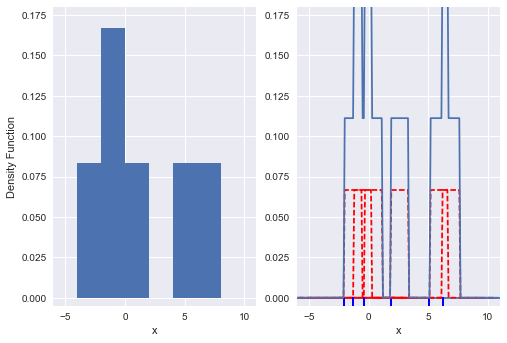

In [50]:
 # Generate dummy data
data = np.array([-2.1, -1.3, -0.4, 1.9, 5.1, 6.2])

# Define the two plots
fig, ax = plt.subplots(1,2)
ax[0].hist(data, bins=6, range=[-4, 8], normed=True)
ax[0].set_xlim(-6, 11)
ax[0].set_ylim(-0.005, 0.18)
ax[0].set_xlabel('x')
ax[0].set_ylabel('Density Function')
#plt.show()

# Prepare cumulative arrays
xcum = np.arange(-6, 11, 0.1)
ycum = np.zeros_like(xcum)

# Width of the individual Gaussians
var = 2.25
sd = np.sqrt(var)

# Plot individual Gaussians
ax[1].set_xlim(-6, 11)
ax[1].set_ylim(-0.005, 0.18)
ax[1].set_xlabel('x')
ax[1].axhline(0)

for ii in range(len(data)):
    ax[1].plot([data,data], [0, -0.005], 'b')    
    ycum = plotUnif(data[ii], sd, xcum, ycum)

    # Plot cumulative curve
ycum /= np.sum(ycum)/10
ax[1].plot(xcum, ycum)


plt.show()